https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
from src.preprocessing import PreprocessDataTrainTestSplit

from src.init_parameters import init_parameters
from src.vectorize import vectorize_data
from src.gibbs_sampler import gibbs_sampler_joint_post

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import  StandardScaler

In [2]:
root_path = Path(os.getcwd())
data_path = root_path.joinpath("Macro1.csv")

In [3]:
preprocess_train_test = PreprocessDataTrainTestSplit(data_path=data_path,split_date= '1999-12-01', normalize=False, max_date='2006-12-31')
train_df, test_df = preprocess_train_test.process()

X = train_df.drop('INDPRO', axis=1).values
y = train_df['INDPRO'].values

X_test = test_df.drop('INDPRO', axis=1).values
y_test = test_df['INDPRO'].values

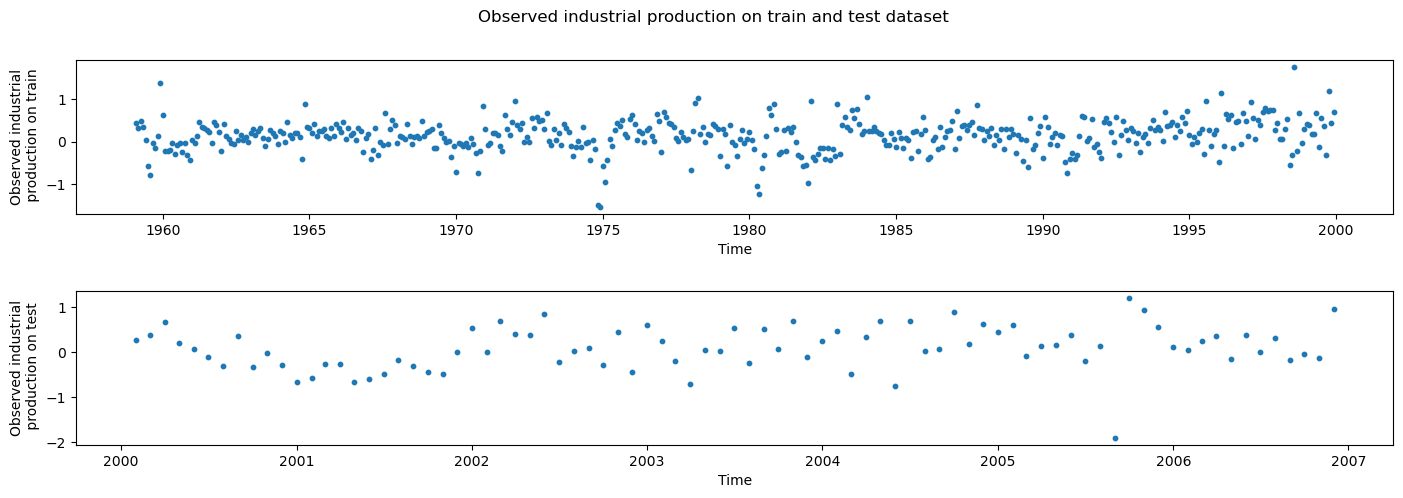

In [4]:
plt.figure(figsize=(17,5))
plt.subplot(2, 1, 1)
plt.scatter(train_df.index, y, marker='o', s=10, label="True label")
plt.xlabel('Time')
plt.ylabel("Observed industrial\n production on train")

plt.subplot(2, 1, 2)
plt.scatter(test_df.index, y_test, marker='o', s=10, label="True label")
plt.xlabel('Time')
plt.ylabel("Observed industrial\n production on test")

plt.subplots_adjust(hspace=0.5)
plt.suptitle("Observed industrial production on train and test dataset")
plt.show()

array([ 0.2722,  0.3917,  0.6738,  0.199 ,  0.0728, -0.1093, -0.3154,
        0.3508, -0.3213, -0.0065, -0.2751, -0.6714, -0.5684, -0.2683,
       -0.2705, -0.6569, -0.5949, -0.4746, -0.1778, -0.3107, -0.4374,
       -0.4749,  0.0152,  0.5388,  0.0123,  0.6857,  0.3986,  0.3826,
        0.8543, -0.2121,  0.0177,  0.0905, -0.2818,  0.4578, -0.4314,
        0.6049,  0.2534, -0.189 , -0.7034,  0.0425,  0.034 ,  0.5334,
       -0.2294,  0.5134,  0.0645,  0.6904, -0.1027,  0.2417,  0.4814,
       -0.4749,  0.3462,  0.6985, -0.745 ,  0.7056,  0.0283,  0.0644,
        0.8895,  0.1935,  0.6397,  0.4433,  0.6109, -0.0843,  0.1279,
        0.165 ,  0.3789, -0.1878,  0.1466, -1.9047,  1.2145,  0.9371,
        0.5513,  0.1166,  0.0405,  0.2481,  0.3658, -0.1398,  0.375 ,
        0.0118,  0.3268, -0.1715, -0.0363, -0.1249,  0.9536])

In [5]:
#Init parameters and vectorize for gibbs sampler
T = X.shape[0]
k = X.shape[1]
l = 0
a = 1
b = 1
A = 1
B = 1
sigma2 = 1
dct = init_parameters(T, k, l, a, b, A, B, X,1)
data0 = vectorize_data(dct=dct,T=T,k=k,l=l,a=a,b=b,A=A,B=B) #Model vectorization

121
121


In [6]:
#Launching of Gibbs sampler
data1, accu = gibbs_sampler_joint_post(data0, n_iter = 1000, burn_in_period=100, n_iter_zi=1, seed=1, debug = True)

In [9]:
#Computation of the predictions of Y
accu["beta post"]
#beta = np.array(accu["beta post"][100])
#beta.shape[1]
#Ypred = X[:,0:40]@np.transpose(beta)


[array([[0.        , 0.        , 0.        , 0.        , 1.00011848,
         1.28202262, 0.32071622, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         1.19148695, 1.01998955, 0.79517315, 1.00041123, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 1.00368282, 0.        , 1.007254  , 0.99658966,
         0.        , 0.        , 0.99150094, 0.        , 0.        ,
         0.        , 0.98670912, 1.00043762, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 1.00145688, 1.00105261, 0.        , 0.        ,
         0.        , 0.        , 1.0000027 , 1.00213447, 0.        ,
         1.00005356, 0.        , 0.        , 1.02337316, 0.        ,
         0.        , 0.        , 0.        , 1.00000486, 1.06490477,
         0.        , 0.94985135, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0

array([-23193.73792008,  27307.49043922,  14433.00056789,  -4367.51992725,
        49291.58349835, -35257.94855258,   7684.83690842,  25048.762256  ,
       -13148.6956935 ,   2293.73610622,   5144.45718782, -12518.02823589,
         1882.89910647, -17141.13062113, -15582.1720461 ,  13322.44902911,
       -25010.26537145, -11225.00059551,   8060.30496601, -37703.56591506,
        34968.89118741, -33195.85038289,  -6345.04582022,  10610.25390024,
         7302.06107449, -14206.38353376,  18520.73113708,   3726.00749993,
          516.12689791,  16979.68353573,  14107.53121564, -13521.40376064,
         1054.63909993,  13439.13744029,  -3255.21408555,  13354.85768139,
        -2938.63992771,  13946.45139499,  -5092.36446012,   5395.05092644,
        13241.16857437,  10116.03122206,  -6460.78692387,  13436.36269154,
        12698.6063208 ,   5966.12245845,   -198.99319962,  -6278.00243705,
        21205.47476891,  52919.13336019, -13720.17399222,  14423.37816345,
         9163.71083458,  

In [28]:
test_df.shape[0]

83

# Cross validation

Train R2: 1.0
Train MSE: 2.1335692665164847e-31
Val R2: 0.3332309013533663
Val MSE: 0.04601042032844965


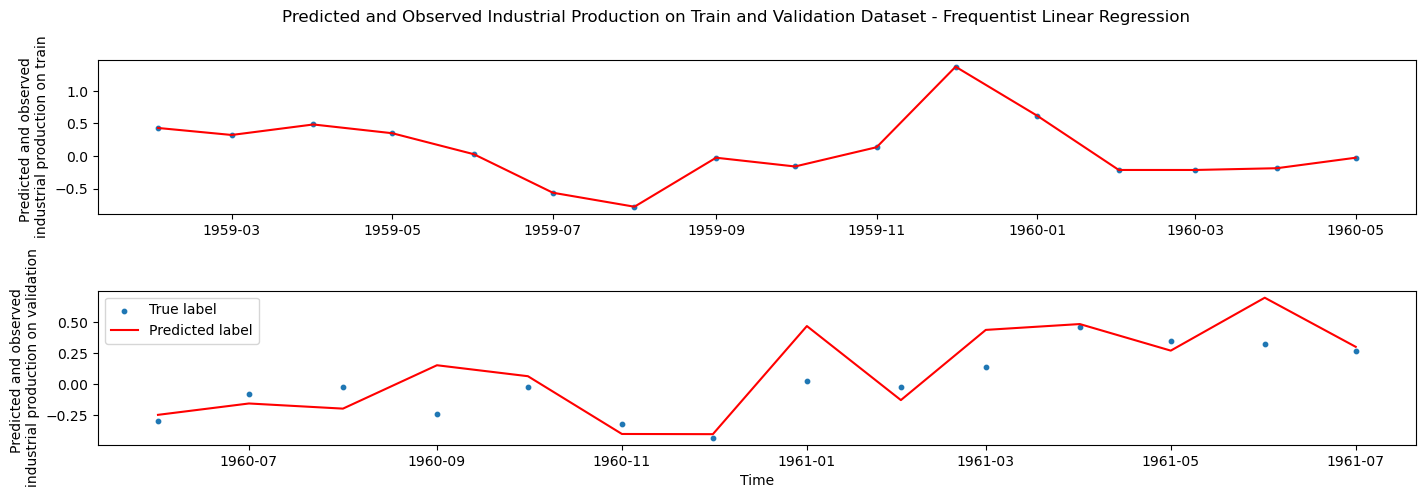

Train R2: 1.0
Train MSE: 7.015841799078636e-32
Val R2: 0.7543472000659288
Val MSE: 0.00852418118484924


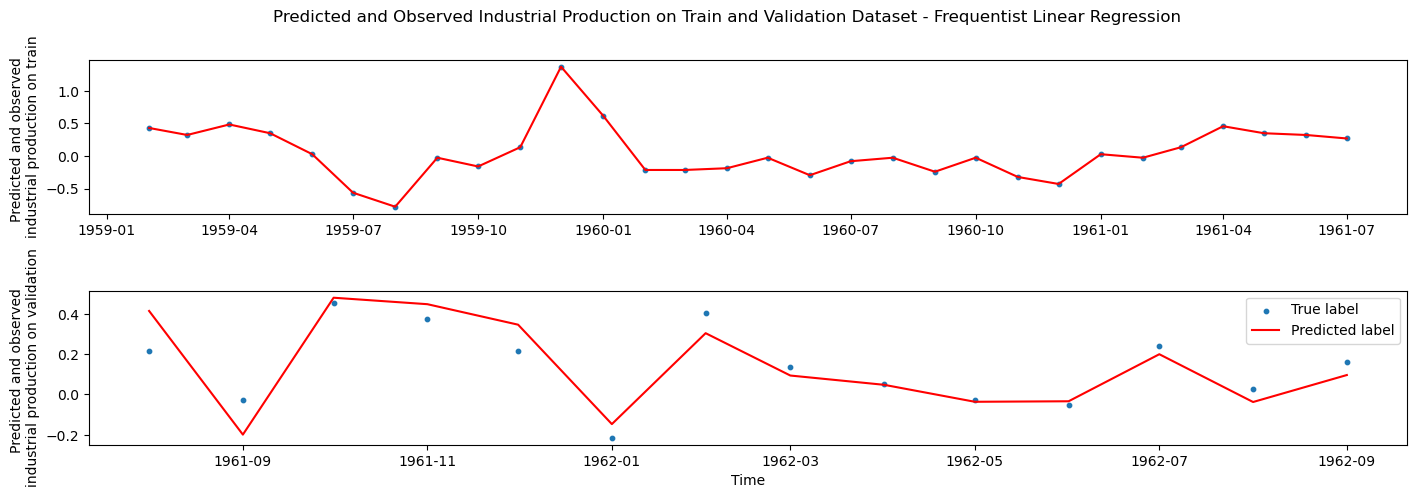

Train R2: 1.0
Train MSE: 6.299213480037002e-32
Val R2: 0.0712022487631514
Val MSE: 0.012923998744753333


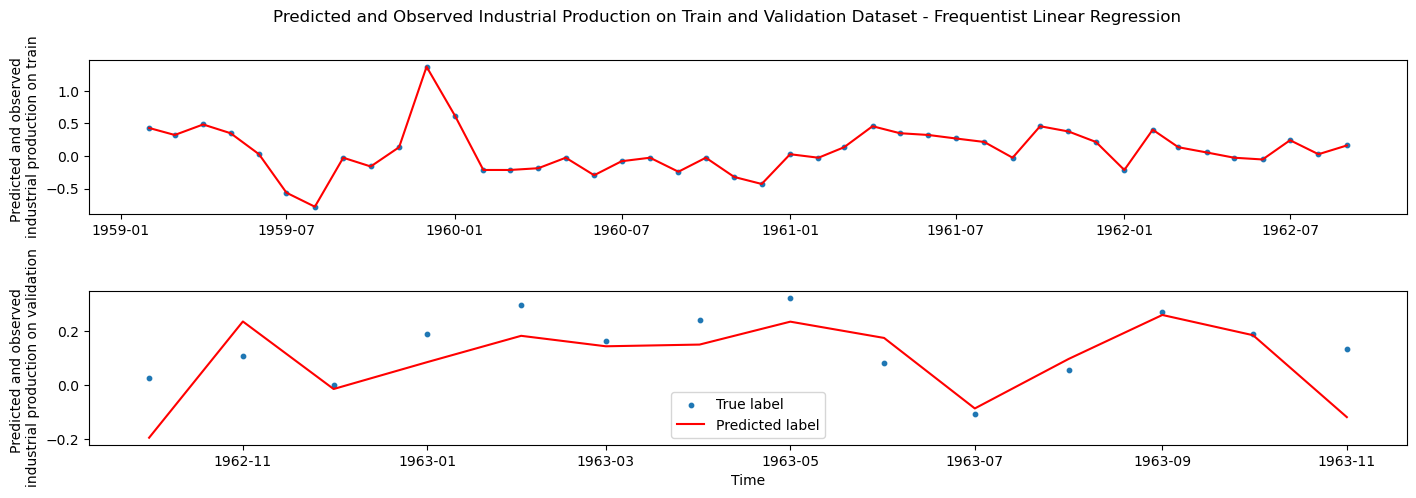

Train R2: 1.0
Train MSE: 3.108882604194051e-31
Val R2: 0.9530661549493282
Val MSE: 0.0035759589560642323


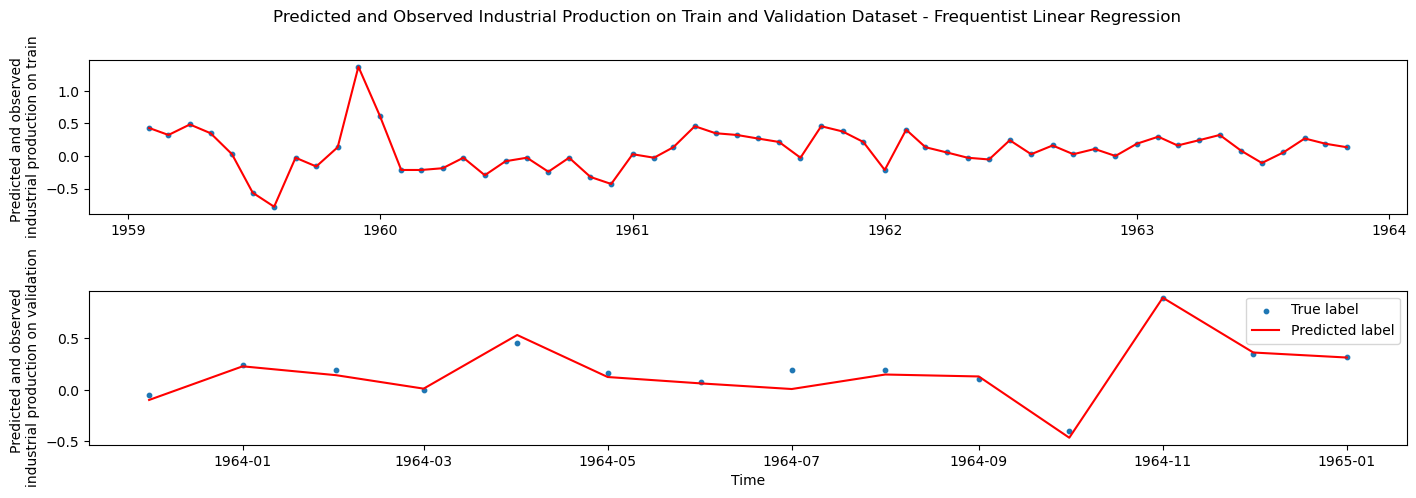

Train R2: 1.0
Train MSE: 2.3906742268354295e-31
Val R2: 0.2987426214010055
Val MSE: 0.008785267143292636


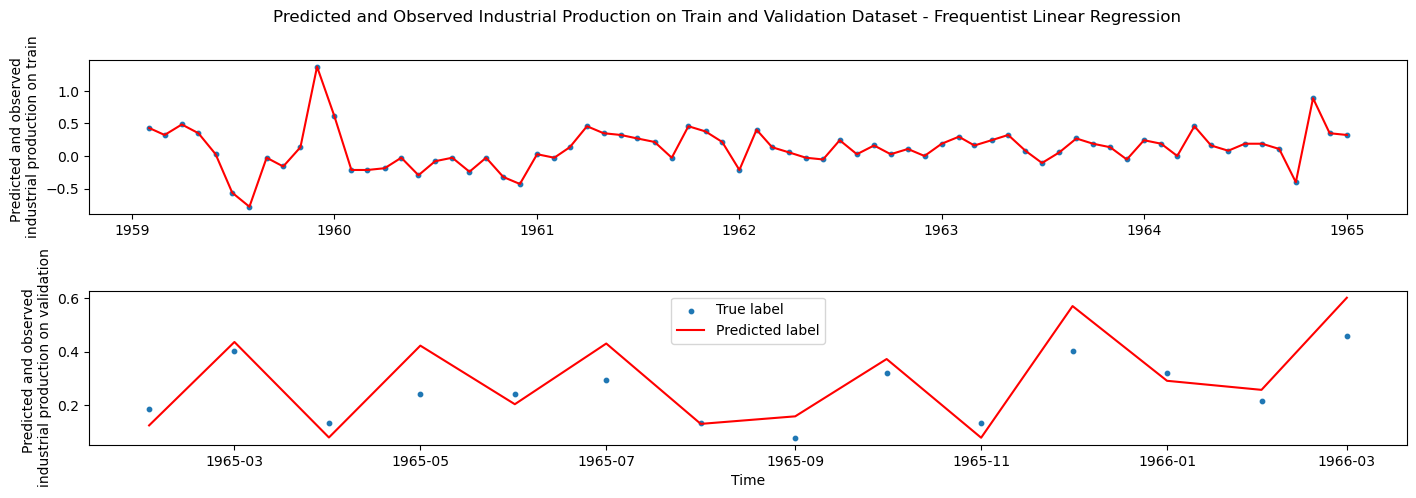

Average MSE - train: 1.7929263250915054e-31
Average R2 - train: 1.0
Average MSE - validation: 0.01596396527148182
Average R2 - validation: 0.482117825306556


In [87]:
LR = LinearRegression()
tscv = TimeSeriesSplit(n_splits=5)
list_mse_train = []
list_r2_train = []
list_mse_val = []
list_r2_val = []

for train_index, val_index in tscv.split(X):
    X_train, X_val = X[train_index, :], X[val_index, :]
    y_train, y_val = y[train_index], y[val_index]

    scaler = StandardScaler()
    X_train_transform = scaler.fit_transform(X_train)
    X_val_transform = scaler.transform(X_val)
    
    LR.fit(X_train_transform, y_train)
    y_pred_train = LR.predict(X_train_transform)
    y_pred_val = LR.predict(X_val_transform)

    r2_train = r2_score(y_train, y_pred_train)
    r2_val = r2_score(y_val, y_pred_val)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_val = mean_squared_error(y_val, y_pred_val)

    list_mse_train.append(mse_train)
    list_r2_train.append(r2_train)
    list_mse_val.append(mse_val)
    list_r2_val.append(r2_val)

    print("Train R2: {}".format(r2_train))
    print("Train MSE: {}".format(mse_train))
    print("Val R2: {}".format(r2_val))
    print("Val MSE: {}".format(mse_val))

    plt.figure(figsize=(17,5))
    plt.subplot(2, 1, 1)
    plt.scatter(train_df.index[train_index], y_train, marker='o', s=10, label="True label")
    plt.plot(train_df.index[train_index], y_pred_train, color='red', label="Predicted label")
    plt.ylabel("Predicted and observed \nindustrial production on train")

    plt.subplot(2, 1, 2)
    plt.scatter(train_df.index[val_index], y_val, marker='o', s=10, label="True label")
    plt.plot(train_df.index[val_index], y_pred_val, color='red', label="Predicted label")
    plt.xlabel('Time')
    plt.ylabel("Predicted and observed \nindustrial production on validation")
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle("Predicted and Observed Industrial Production on Train and Validation Dataset - Frequentist Linear Regression")
    plt.legend()
    plt.show()

print("Average MSE - train: {}".format(sum(list_mse_train)/len(list_mse_train)))
print("Average R2 - train: {}".format(sum(list_r2_train)/len(list_r2_train)))
print("Average MSE - validation: {}".format(sum(list_mse_val)/len(list_mse_val)))
print("Average R2 - validation: {}".format(sum(list_r2_val)/len(list_r2_val)))

In [8]:
#Cross validation with Bayesian regression
tscv = TimeSeriesSplit(n_splits=5)
list_mse_train = []
list_r2_train = []
list_mse_val = []
list_r2_val = []



for train_index, val_index in tscv.split(X):
    X_train, X_val = X[train_index, :], X[val_index, :]
    y_train, y_val = y[train_index], y[val_index]

    scaler = StandardScaler()
    X_train_transform = scaler.fit_transform(X_train)
    X_val_transform = scaler.transform(X_val)
    
    T = X_train_transform.shape[0]
    k = X_train_transform.shape[1]
    print(k)
    print(T)
    data2 = []
    dct1 = []
    print(X_train_transform.shape[0])
    dct1 = init_parameters(T, k, l, a, b, A, B, X_train_transform,1)

    data2 = vectorize_data(dct=dct1,T=T,k=k,l=l,a=a,b=b,A=A,B=B) #Model vectorization


121
86
86
121
121


ValueError: could not broadcast input array from shape (121,) into shape (86,)

# Simple Validation

## Standardization

In [11]:
scaler = StandardScaler()
X_transform = scaler.fit_transform(X)
X_test_transform = scaler.transform(X_test)

## Bayesian regression

In order to compute the predictions, we use the following two methods :

compute the prediction with each sampled beta, and then compute the mean of the predictions
compute the prediction with the last predicted beta

In [12]:
#Prevision with the last sampled value of beta

beta = accu["beta post"][899][0]

Ypredlastvalue = X_test_transform@beta
Ytrainpredlastvalue = X_transform@beta

In [24]:
#Predict Bayesian function

def predictYbayesian(X,beta) :
    return X@beta



In [13]:
Ytrainpredlastvalue

array([-2.68245325e+00,  1.07425384e-01,  2.07847970e+00, -2.02574799e+00,
       -5.01801973e+00, -1.67905000e+00, -1.55719741e+01, -5.48890117e+00,
       -1.29818653e+01, -9.94331662e-01,  1.28492288e+01, -1.17482386e+01,
       -5.25008545e+00, -1.72612747e+01,  7.47574587e+00, -1.35188537e+01,
       -1.04102314e+01, -1.07575999e+01, -4.06725972e+00, -7.16441594e+00,
       -8.04374615e+00, -1.21892847e+01, -1.36427286e+01, -2.35246487e+00,
       -1.67389079e+01, -1.89340868e+00, -4.85811091e+00, -1.45352629e+00,
        3.54753520e+00,  1.60150682e+00, -6.26596754e+00, -1.00995574e+01,
       -9.32563022e-01, -3.09523975e+00, -4.51212203e+00, -5.68947394e+00,
        1.13886962e+00, -7.21121146e+00,  2.30078549e+00, -3.97421039e+00,
       -1.01924940e+01, -2.35383702e+00, -5.59129333e+00, -4.07267331e+00,
       -3.14177335e+00, -9.43025489e+00, -6.74113457e+00, -3.62415297e+00,
        5.51592249e-01, -2.29457347e+00,  5.02672665e-01, -3.56104594e+00,
       -7.24644941e+00, -

In [25]:
#Computation of the Bayesian predictions on the train sample

Yprevtrain = np.zeros(X_transform.shape[0])

for i in range(900) :
    beta = np.array(accu["beta post"][i][0])
    Yprevtrain += predictYbayesian(X_transform,np.transpose(beta))

Yprevtrain = Yprevtrain/T

In [26]:
#Computation of the Bayesian predictions on the test sample

Yprev = np.zeros(X_test_transform.shape[0])

for i in range(900) :
    beta = np.array(accu["beta post"][i][0])
    Yprev += predictYbayesian(X_test_transform,beta)

Yprev = Yprev/T


In [28]:
#Normalization of Ytrain on the train sample
Yprevtrainnorm = 2*((Yprevtrain - np.min(Yprevtrain))/(np.max(Yprevtrain) - np.min(Yprevtrain))) - 1


In [29]:
#Normalization of Yprev on the test sample
Yprevnorm = 2*((Yprev - np.min(Yprev))/(np.max(Yprev) - np.min(Yprev))) - 1 

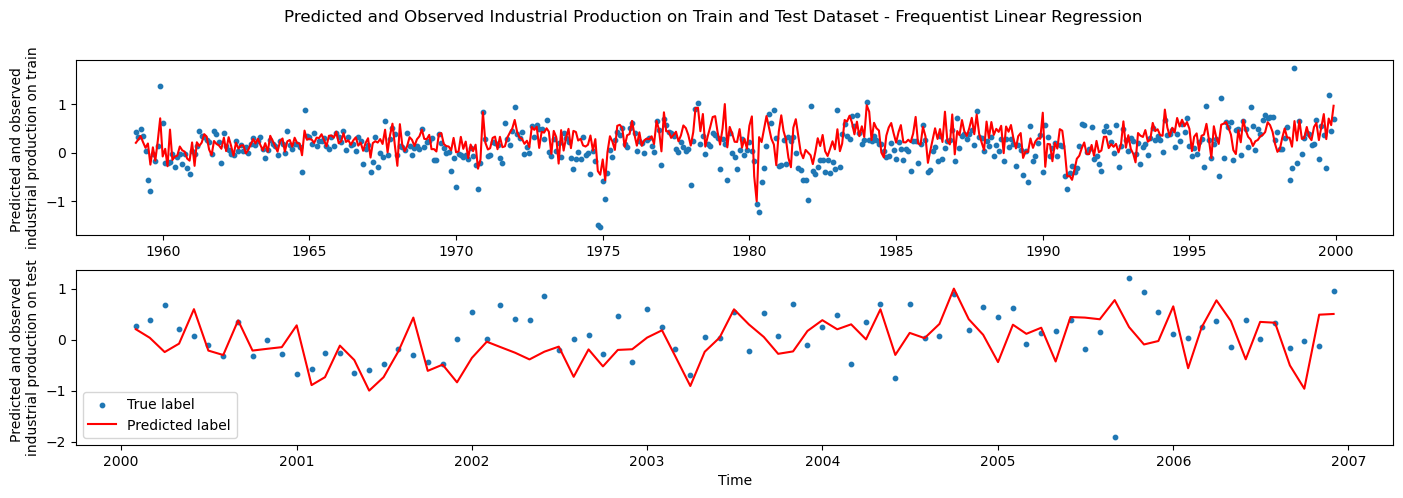

In [30]:
plt.figure(figsize=(17,5))
plt.subplot(2, 1, 1)
plt.scatter(train_df.index, y, marker='o', s=10, label="True label")
plt.plot(train_df.index, Yprevtrainnorm , color='red', label="Predicted label")
plt.ylabel("Predicted and observed \nindustrial production on train")

plt.subplot(2, 1, 2)
plt.scatter(test_df.index, y_test, marker='o', s=10, label="True label")
plt.plot(test_df.index, Yprevnorm, color='red', label="Predicted label")
plt.xlabel('Time')
plt.ylabel("Predicted and observed \nindustrial production on test")

plt.suptitle("Predicted and Observed Industrial Production on Train and Test Dataset - Frequentist Linear Regression")
plt.legend()
plt.show()

## Linear Regression

In [50]:
LR = LinearRegression()
LR.fit(X_transform, y)
y_pred_train = LR.predict(X_transform)
y_pred_test = LR.predict(X_test_transform)

r2_train = r2_score(y, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Train R2: {}".format(r2_train))
print("Test R2: {}".format(r2_test))
print("Train MSE: {}".format(mse_train))
print("Test MSE: {}".format(mse_test))

Train R2: 0.9981167965538917
Test R2: 0.9965097414359181
Train MSE: 0.00025821278813550745
Test MSE: 0.000810548573199027


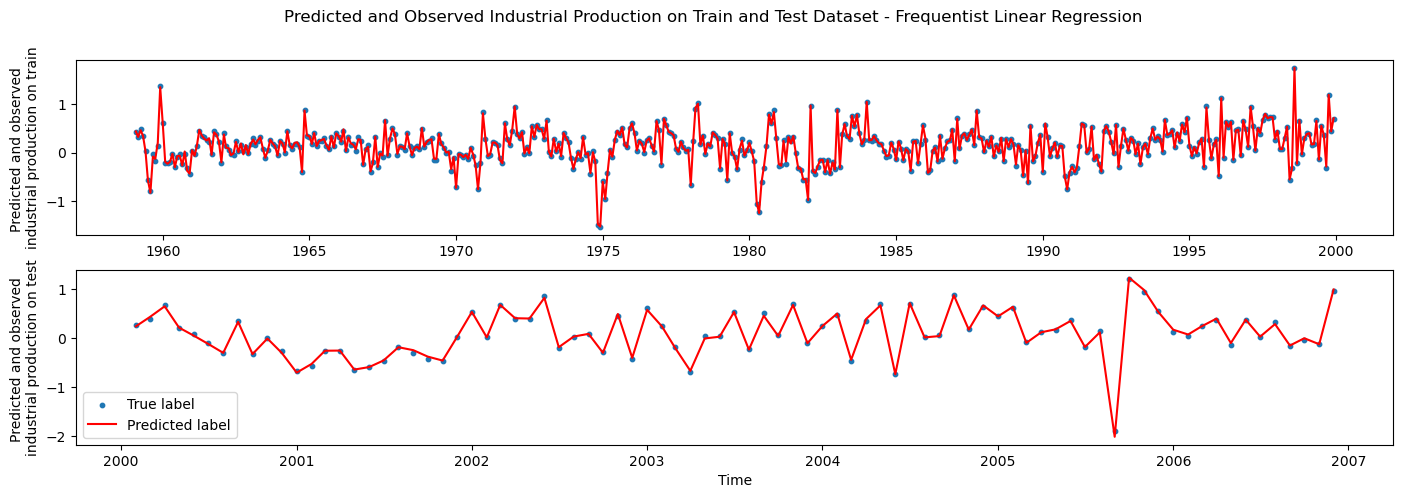

In [51]:
plt.figure(figsize=(17,5))
plt.subplot(2, 1, 1)
plt.scatter(train_df.index, y, marker='o', s=10, label="True label")
plt.plot(train_df.index, y_pred_train, color='red', label="Predicted label")
plt.ylabel("Predicted and observed \nindustrial production on train")

plt.subplot(2, 1, 2)
plt.scatter(test_df.index, y_test, marker='o', s=10, label="True label")
plt.plot(test_df.index, y_pred_test, color='red', label="Predicted label")
plt.xlabel('Time')
plt.ylabel("Predicted and observed \nindustrial production on test")

plt.suptitle("Predicted and Observed Industrial Production on Train and Test Dataset - Frequentist Linear Regression")
plt.legend()
plt.show()

## Lasso Regression

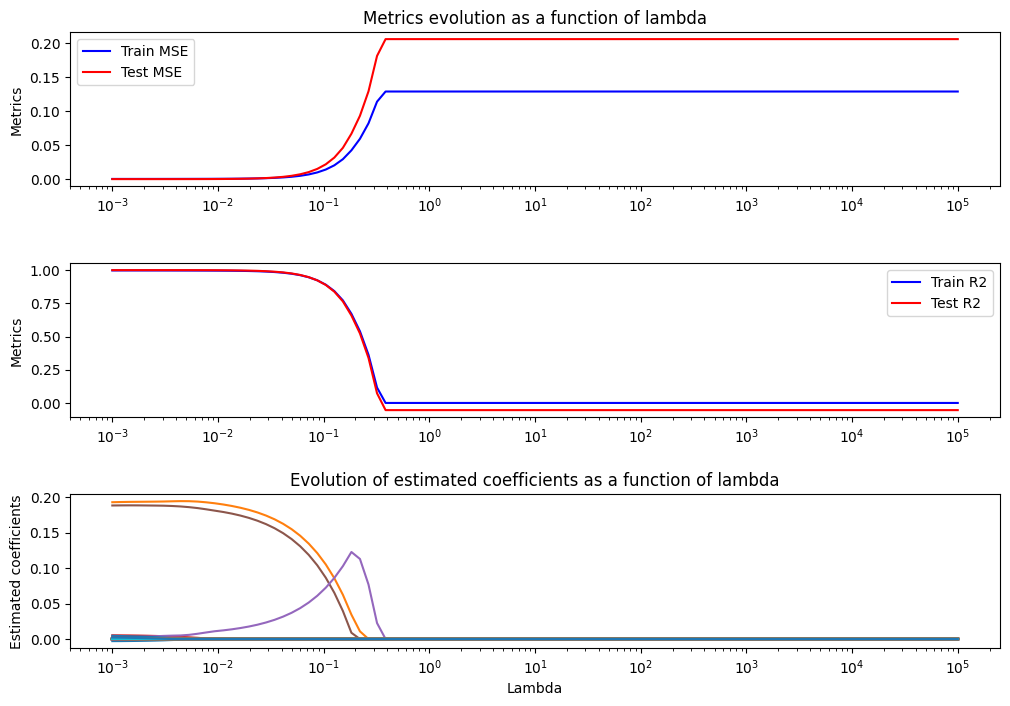

In [9]:
## Loop over lambda
range_alpha=np.logspace(-3, 5, 100)
list_mse_train=[]
list_mse_test=[]
list_r2_train=[]
list_r2_test=[]
list_parameters=[]

for alpha in range_alpha:
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_transform, y)
    y_pred_train=lasso.predict(X_transform)
    y_pred_test=lasso.predict(X_test_transform)

    mse_train=mean_squared_error(y, y_pred_train)
    mse_test=mean_squared_error(y_test, y_pred_test)
    r2_train=r2_score(y, y_pred_train)
    r2_test=r2_score(y_test, y_pred_test)
    list_parameters_lasso=list(lasso.coef_)

    list_mse_train.append(mse_train)
    list_mse_test.append(mse_test)
    list_r2_train.append(r2_train)
    list_r2_test.append(r2_test)
    list_parameters.append(list_parameters_lasso)

array_parameters=np.array(list_parameters)

## Plots
plt.figure(figsize=(12,8))
plt.subplots_adjust(hspace=0.5)

plt.subplot(3, 1, 1)

plt.semilogx(range_alpha, list_mse_train, color='blue', label="Train MSE")
plt.plot(range_alpha, list_mse_test, color='red', label="Test MSE")
plt.ylabel("Metrics")
plt.legend()
plt.title("Metrics evolution as a function of lambda")

plt.subplot(3,1,2)
plt.semilogx(range_alpha, list_r2_train, color='blue', label="Train R2")
plt.plot(range_alpha, list_r2_test, color='red', label="Test R2")
plt.ylabel("Metrics")
plt.legend()

plt.subplot(3,1,3)
for j in range(array_parameters.shape[1]):
    plt.semilogx(range_alpha, array_parameters[:,j])
plt.xlabel("Lambda")
plt.ylabel("Estimated coefficients")
plt.title("Evolution of estimated coefficients as a function of lambda")
plt.show()

In [10]:
index_min_mse=np.argmin(list_mse_test)
optimal_lambda=range_alpha[index_min_mse]
print("Lambda minimizing test MSE: {}".format(round(optimal_lambda, 2)))

Lambda minimizing test MSE: 0.0
